# Task 6. Algorithms on graphs. Path search algorithms on weighted graphs

# Part I

In [35]:
import numpy as np
import random
import time
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import math

In [24]:
vertices = 100
edges = 500
max_weight = 100

# Generating adjacency matrix
def generate_adjacency_matrix(vertices, edges, max_weight):
    random.seed(1)
    matrix = np.zeros((vertices, vertices), dtype=int)
    count = 0
    while count < edges:
        i, j = random.sample(range(vertices), 2)
        if matrix[i][j] == 0 and i != j:
            weight = random.randint(1, max_weight)
            matrix[i][j] = weight
            matrix[j][i] = weight
            count += 1
    return matrix

In [25]:
#Algorithms
def dijkstra(matrix, source):
    n = len(matrix)
    visited = [False] * n
    distance = [float('inf')] * n
    distance[source] = 0

    for _ in range(n):
        u = np.argmin([distance[i] if not visited[i] else float('inf') for i in range(n)])
        visited[u] = True

        for v in range(n):
            if matrix[u][v] and not visited[v]:
                distance[v] = min(distance[v], distance[u] + matrix[u][v])
    return distance

def bellman_ford(matrix, source):
    n = len(matrix)
    distance = [float('inf')] * n
    distance[source] = 0

    edges = [(u, v) for u in range(n) for v in range(n) if matrix[u][v]]

    for _ in range(n-1):
        for u, v in edges:
            if distance[u] + matrix[u][v] < distance[v]:
                distance[v] = distance[u] + matrix[u][v]

    return distance

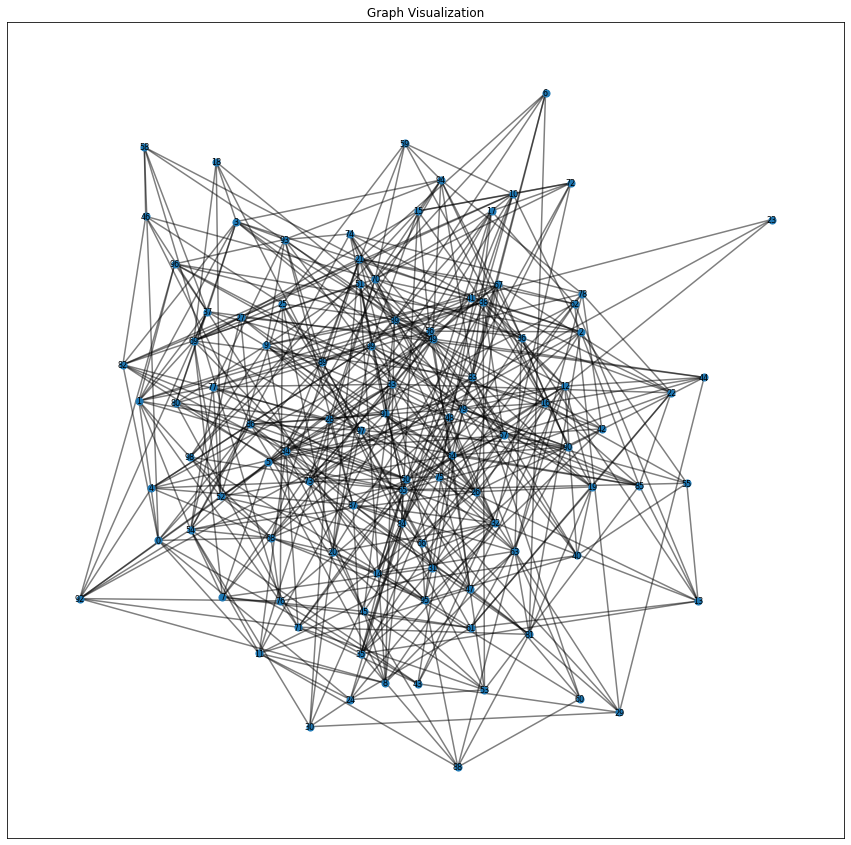

(0.005467009544372558, 0.03303885459899902)

In [32]:
# Additional functions and results
def measure_time(func, matrix, source):
    start_time = time.time()
    func(matrix, source)
    return time.time() - start_time

def repeat_experiments(matrix, source):
    dijkstra_times = []
    bellman_ford_times = []

    for _ in range(10):
        dijkstra_times.append(measure_time(dijkstra, matrix, source))
        bellman_ford_times.append(measure_time(bellman_ford, matrix, source))

    avg_dijkstra_time = sum(dijkstra_times) / 10
    avg_bellman_ford_time = sum(bellman_ford_times) / 10

    return avg_dijkstra_time, avg_bellman_ford_time

def matrix_to_graph(matrix):
    G = nx.Graph()
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j]:
                G.add_edge(i, j, weight=matrix[i][j])
    return G

matrix = generate_adjacency_matrix(vertices, edges, max_weight)
G = matrix_to_graph(matrix)

plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Graph Visualization")
plt.show()

source_vertex = random.randint(0, vertices-1)
avg_dijkstra_time, avg_bellman_ford_time = repeat_experiments(matrix, source_vertex)
avg_dijkstra_time, avg_bellman_ford_time

In [33]:
print(f"Average Dijkstra's Algorithm Time: {avg_dijkstra_time} seconds")
print(f"Average Bellman-Ford Algorithm Time: {avg_bellman_ford_time} seconds")


Average Dijkstra's Algorithm Time: 0.005467009544372558 seconds
Average Bellman-Ford Algorithm Time: 0.03303885459899902 seconds


# Part II

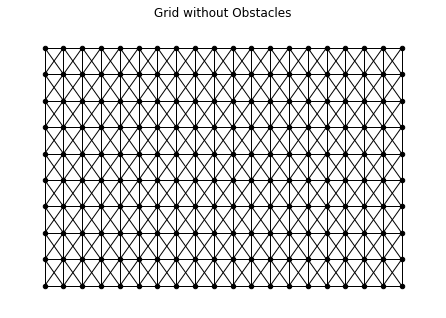

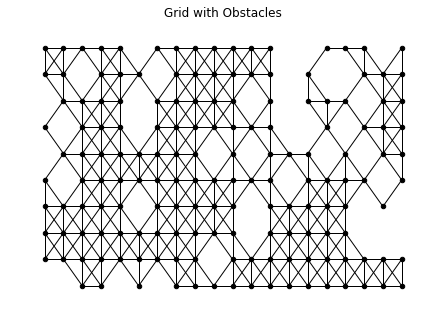

Obstacle cells [(6, 19), (0, 18), (3, 1), (4, 17), (1, 15), (3, 13), (2, 11), (8, 9), (9, 4), (5, 1), (4, 11), (2, 5), (2, 17), (3, 16), (9, 1), (1, 16), (4, 9), (6, 5), (6, 17), (3, 14), (1, 2), (6, 11), (9, 6), (2, 13), (5, 18), (0, 5), (9, 0), (7, 19), (7, 11), (1, 6), (7, 17), (4, 15), (5, 13), (3, 5), (7, 18), (0, 14), (0, 13), (4, 0), (2, 0), (1, 13)]


In [72]:
# Constants
rows = 10
cols = 20
obstacles = 40

# Generating grid and placing obstacles
def generate_grid(rows, cols, obstacles):
    grid = np.zeros((rows, cols), dtype=int)
    obstacle_positions = random.sample([(i, j) for i in range(rows) for j in range(cols)], obstacles)
    for pos in obstacle_positions:
        grid[pos] = 1
    return grid, obstacle_positions

G = nx.grid_2d_graph(rows, cols)

for edge in G.edges:
    G.edges[edge]['weight'] = 1

G.add_edges_from([((x, y), (x+1, y+1)) 
                  for x in range(rows - 1) 
                  for y in range(cols - 1)] + 
                 [((x+1, y), (x, y+1))
                  for x in range(rows - 1)
                  for y in range(cols - 1)], weight=1.4)

# Using grid positioning
pos = {(x, y): (y, -x) for x, y in G.nodes()}

nx.draw(G, pos, node_size=20, with_labels=False, node_color="k")
plt.title("Grid without Obstacles")
plt.show()

grid, obstacle_positions = generate_grid(rows, cols, obstacles)
G.remove_nodes_from(obstacle_positions)
nx.draw(G, pos, node_size=20, with_labels=False, node_color="k")
plt.title("Grid with Obstacles")
plt.show()

print("Obstacle cells", obstacle_positions)

In [73]:
import math
import numpy as np

def euclidean(start, target):
    h = math.sqrt((target[0] - start[0]) ** 2 + (target[1] - start[1]) ** 2)
    return h

def find_path(start, target):
    print(f'Finding path from {start} to {target}')
    path = nx.astar_path(G, start, target, heuristic=euclidean)
    print(f'Found path: {path}\n')
    return path
 
all_paths = []
for i in range(5):
    while True:
        start = (np.random.randint(0, rows), np.random.randint(0, cols))
        target = (np.random.randint(0, rows), np.random.randint(0, cols))
        if (start not in obstacle_positions) and (target not in obstacle_positions) and start != target:
            break
    all_paths.append(find_path(start, target))

def plot_paths(G, pos, path):
    plt.figure(figsize=(10,5)) 
    nx.draw(G, pos, node_size=10, node_color='k', with_labels=False)
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r', node_size=30)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    plt.show()

Finding path from (1, 7) to (0, 19)
Found path: [(1, 7), (1, 8), (1, 9), (2, 10), (3, 11), (3, 12), (4, 13), (4, 14), (3, 15), (2, 16), (1, 17), (1, 18), (0, 19)]

Finding path from (0, 4) to (0, 11)
Found path: [(0, 4), (1, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11)]

Finding path from (6, 14) to (9, 14)
Found path: [(6, 14), (7, 14), (8, 14), (9, 14)]

Finding path from (5, 3) to (3, 3)
Found path: [(5, 3), (4, 3), (3, 3)]

Finding path from (6, 1) to (1, 11)
Found path: [(6, 1), (5, 2), (4, 3), (4, 4), (4, 5), (3, 6), (3, 7), (2, 8), (2, 9), (1, 10), (1, 11)]



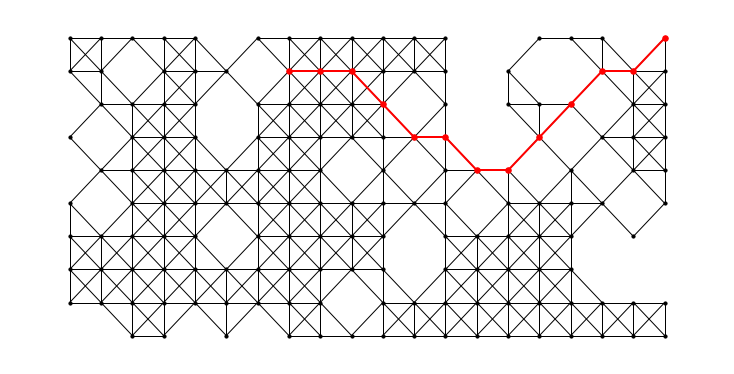

In [74]:
plot_paths(G, pos, all_paths[0])

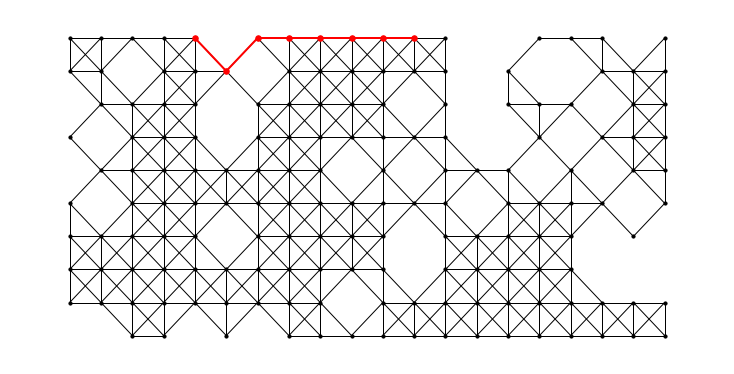

In [75]:
plot_paths(G, pos, all_paths[1])

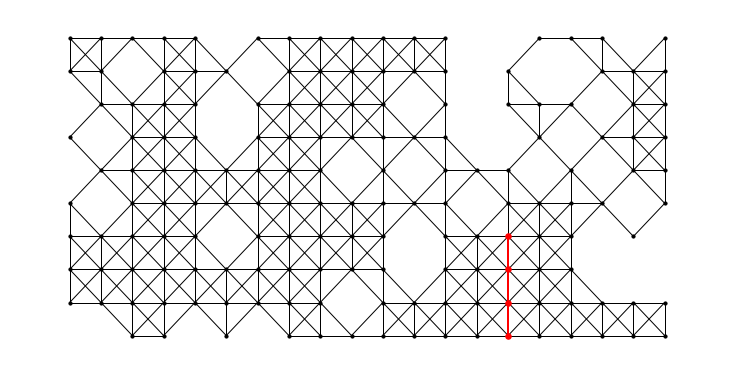

In [76]:
plot_paths(G, pos, all_paths[2])

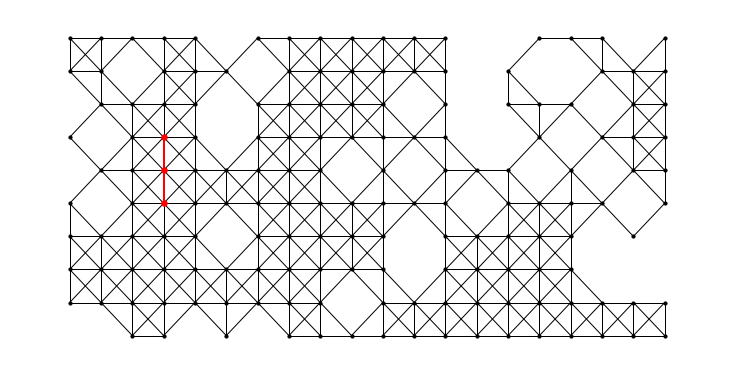

In [77]:
plot_paths(G, pos, all_paths[3])

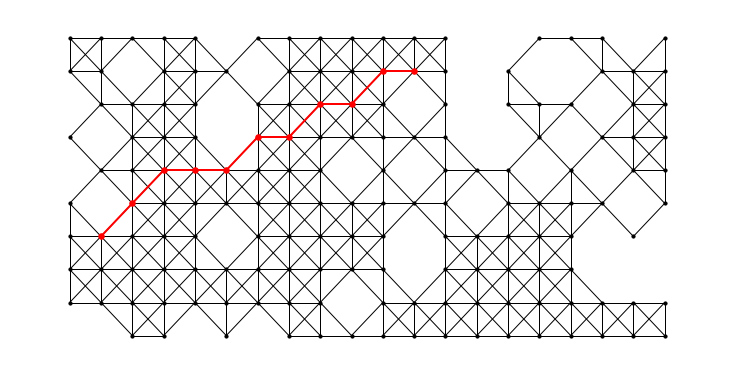

In [78]:
plot_paths(G, pos, all_paths[4])